<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Trader_com_Bandas_de_Bollinger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para Finanças Quantitativas**

Curso do canal [**Outspoken Market.**](https://youtu.be/y-OO9g6R-Hc)

In [10]:
#Carregando as bibliotecas necessárias

from pandas_datareader import data as pdr #suporte para download do yahoofinance
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
!pip install yfinance #instalando
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3MB 3.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=60ec3473dbf4ce1064dc239b71a217b2ea813d10a9858350ccd1766ea08c4016
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [14]:
# configurações iniciais
ticker = "^BVSP" #ativo 
inicio = '2015-01-01'
fin = '2021-06-01'

In [16]:
# Coleta de dados
df = pdr.get_data_yahoo(ticker, start=inicio, end=fin) #método do pdr

[*********************100%***********************]  1 of 1 completed


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,124032.0,124696.0,122701.0,122988.0,122988.0,8914500
2021-05-26,122988.0,124256.0,122988.0,123989.0,123989.0,8258400
2021-05-27,123989.0,124537.0,123470.0,124367.0,124367.0,0
2021-05-28,124367.0,125698.0,124284.0,125561.0,125561.0,8838500
2021-05-31,125561.0,126216.0,125540.0,126216.0,126216.0,5946500


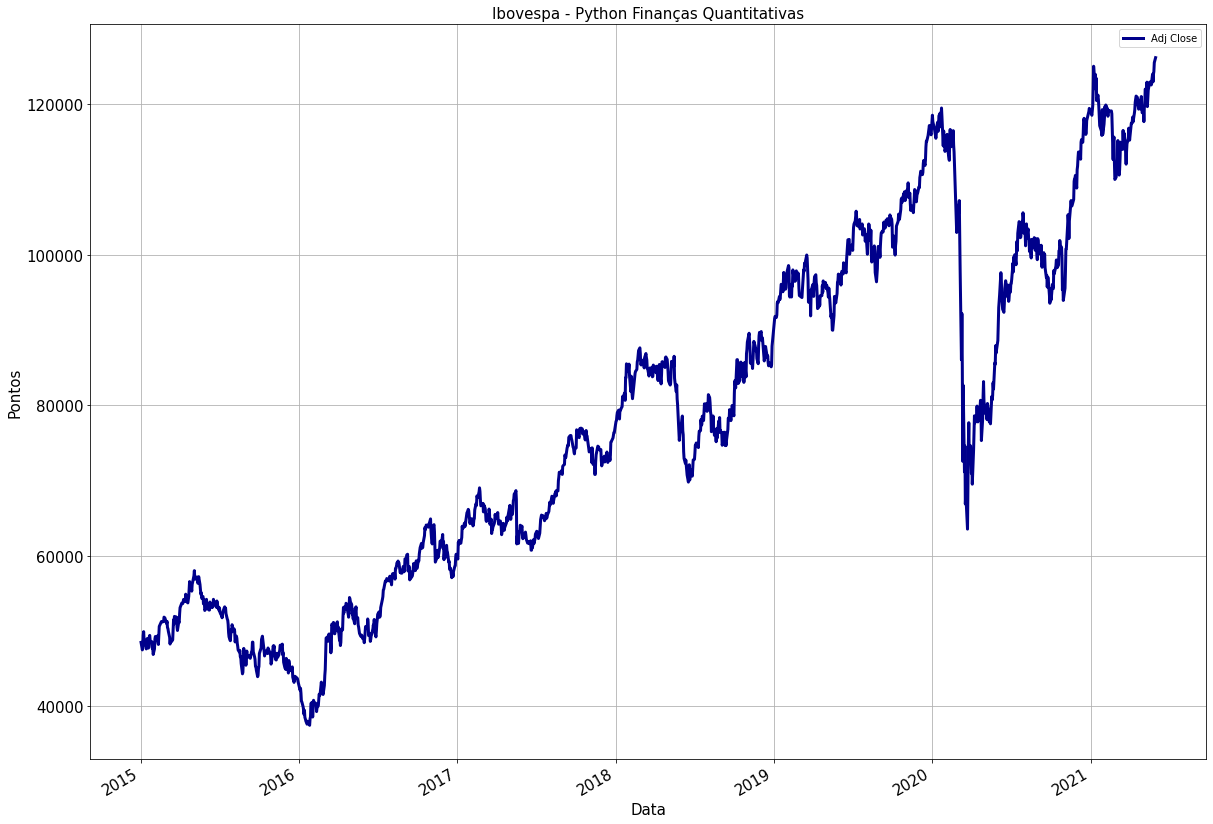

In [23]:
# Primeiro gráfico
df['Adj Close'].plot(grid=True, figsize=(20,15), linewidth=3, 
                     fontsize=15, color='darkblue')
plt.xlabel('Data', fontsize=15);
plt.ylabel('Pontos', fontsize=15);
plt.title('Ibovespa - Python Finanças Quantitativas', fontsize=15);
plt.legend();


In [ ]:
# Calculando as bandas de bollinger

#Parâmetros iniciais
periodo =21
desvios = 2